## Analysis part 2 & 3

#### Code below was used to implement the solution to part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df_counts = utils.create_dataset()

(9788,)


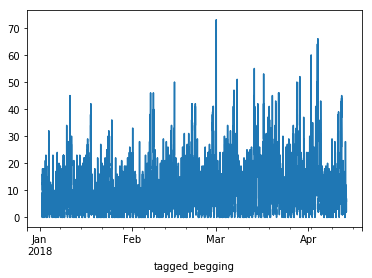

In [3]:
print(df_counts.shape)
ax = df_counts.plot()
plt.show()

In [4]:
# parameters to prepare the dataset for learning # param 
n_lag = 96
n_out = 4
n_features = 1
n_lag,n_features,n_out

(96, 1, 4)

In [5]:
n_test = int(0.2* df_counts.shape[0])
n_test

1957

In [6]:
n_epochs = 10
n_batch = 1
n_neurons = 1

In [7]:
scaler, train, test = utils.prepare_data(df_counts, n_test, n_lag, n_out)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
model = utils.fit_lstm(train, n_lag, n_out, n_batch, n_epochs, n_neurons)

Epoch 1/1
7731/7731 [==============================] - 22s 3ms/step - loss: 0.0208
Epoch 1/1
7731/7731 [==============================] - 20s 3ms/step - loss: 0.0201
Epoch 1/1
7731/7731 [==============================] - 22s 3ms/step - loss: 0.0195
Epoch 1/1
7731/7731 [==============================] - 26s 3ms/step - loss: 0.0195
Epoch 1/1
7731/7731 [==============================] - 22s 3ms/step - loss: 0.0194
Epoch 1/1
7731/7731 [==============================] - 20s 3ms/step - loss: 0.0194
Epoch 1/1
7731/7731 [==============================] - 19s 3ms/step - loss: 0.0194
Epoch 1/1
7731/7731 [==============================] - 19s 3ms/step - loss: 0.0194
Epoch 1/1
7731/7731 [==============================] - 20s 3ms/step - loss: 0.0194
Epoch 1/1
7731/7731 [==============================] - 22s 3ms/step - loss: 0.0194


In [9]:
forecasts = utils.make_forecasts(model, n_batch, train, test, n_lag, n_out)

In [10]:
forecasts = utils.inverse_transform(df_counts, forecasts, scaler, n_test+2)

In [11]:
actual = [row[n_lag:] for row in test]
actual = utils.inverse_transform(df_counts, actual, scaler, n_test+2)

In [12]:
# evaluate forecast on test data
utils.evaluate_forecasts(actual, forecasts, n_lag, n_out)

t+1 RMSE: 4.916554
t+2 RMSE: 5.556220
t+3 RMSE: 6.085043
t+4 RMSE: 6.652421
('R2:', 0.7371760954914681)


In [13]:
# evaluate forecast on training data
n_train = int(0.8* df_counts.shape[0])

forecasts_train = utils.make_forecasts(model, n_batch, train, train, n_lag, n_out)
forecasts_train = utils.inverse_transform(df_counts, forecasts_train, scaler, n_train+2)
actual_train = [row[n_lag:] for row in train]
actual_train = utils.inverse_transform(df_counts, actual_train, scaler, n_train+2)
utils.evaluate_forecasts(actual_train, forecasts_train, n_lag, n_out)

t+1 RMSE: 4.042001
t+2 RMSE: 4.582770
t+3 RMSE: 5.050298
t+4 RMSE: 5.514583
('R2:', 0.7789658795352259)


In [14]:
print(df_counts.mean())
print(df_counts.std())

9.51593788312219
8.328818383338508


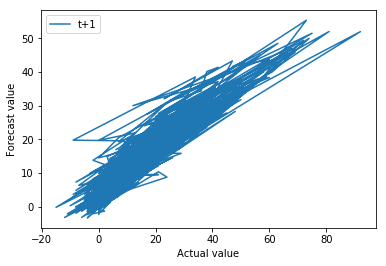

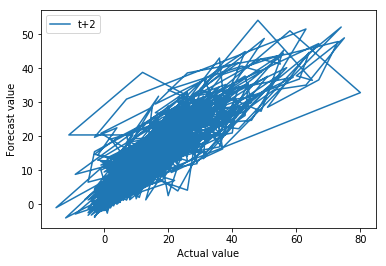

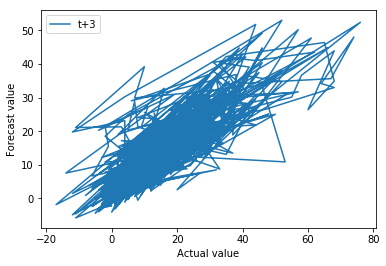

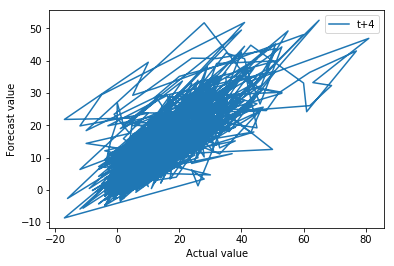

In [15]:
# Scatter plots of forecasts versus actual
actual_t1 = [val[0] for val in actual]
actual_t2 = [val[1] for val in actual]
actual_t3 = [val[2] for val in actual]
actual_t4 = [val[3] for val in actual]
fc_t1 = [val[0] for val in forecasts]
fc_t2 = [val[1] for val in forecasts]
fc_t3 = [val[2] for val in forecasts]
fc_t4 = [val[3] for val in forecasts]

plt.plot(actual_t1, fc_t1, label='t+1')
plt.ylabel('Forecast value')
plt.xlabel('Actual value')
plt.legend()
plt.show()
plt.plot(actual_t2, fc_t2, label='t+2')
plt.ylabel('Forecast value')
plt.xlabel('Actual value')
plt.legend()
plt.show()
plt.plot(actual_t3, fc_t3, label='t+3')
plt.ylabel('Forecast value')
plt.xlabel('Actual value')
plt.legend()
plt.show()
plt.plot(actual_t4, fc_t4, label='t+4')
plt.ylabel('Forecast value')
plt.xlabel('Actual value')
plt.legend()
plt.show()

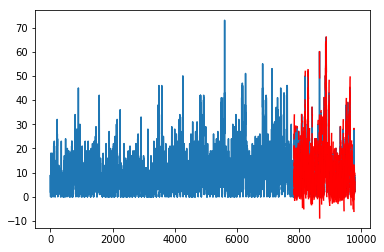

In [16]:
utils.plot_forecasts(df_counts, forecasts, n_test+2)

In [17]:
df_counts.shape

(9788,)

In [18]:
range_ = int(0.79*df_counts.shape[0])
len(forecasts)

1957

In [19]:
df_counts.iloc[range_:,].shape

(2056,)

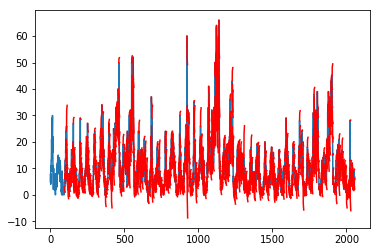

In [20]:
utils.plot_forecasts(df_counts.iloc[range_:,], forecasts, n_test+2)

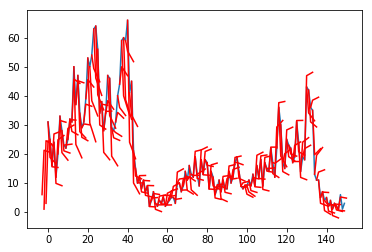

In [21]:
# zoom in to visually inspect model fit at random points in the test data
offset_ = int(0.8*df_counts.shape[0])
start = 1000
end = 1150
forecasts_ = forecasts[start:end]
n_test_ = len(forecasts_)
utils.plot_forecasts(df_counts.iloc[offset_+start:offset_+end,], forecasts_, n_test_+2)

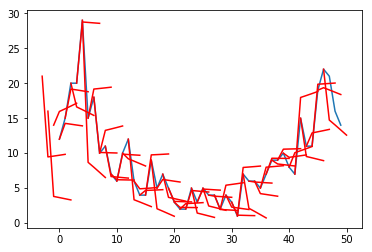

In [22]:
offset_ = int(0.8*df_counts.shape[0])
start = 100
end = 150
forecasts_ = forecasts[start:end]
n_test_ = len(forecasts_)
utils.plot_forecasts(df_counts.iloc[offset_+start:offset_+end,], forecasts_, n_test_+2)

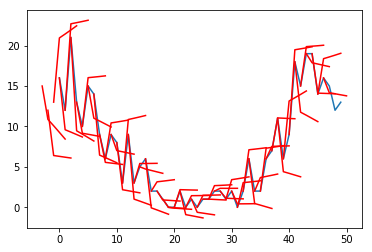

In [23]:
offset_ = int(0.8*df_counts.shape[0])
start = 1500
end = 1550
forecasts_ = forecasts[start:end]
n_test_ = len(forecasts_)
utils.plot_forecasts(df_counts.iloc[offset_+start:offset_+end,], forecasts_, n_test_+2)

### Summary

Since the analysis in part 1 suggested the data to have strong trend, cyclical and stochastic components an LSTM neural network model was chosen to generate forecasts. This is because LSTMs are known for the ability to capture sequence dependence among the input variables. Some of the features of the model:

-  Train/test split of 80/20
-  Window of 96 lagging time steps (1 day) used for each row of data
-  10 epochs
-  Data normalizing used, rescaled to (-1, 1) using MinMaxScaler from scikit-learn
-  Stateful LSTM layer, network state is reset after each epoch

The model forecasts on the test set with R2 value of 0.708 and RMS error as below:

-  t+1 RMSE: 5.135915
-  t+2 RMSE: 5.868180
-  t+3 RMSE: 6.417170
-  t+4 RMSE: 7.012576

The mean and standard deviation of ETH counts in the dataset are 9.5 and 8.3 respectively, suggesting these forecast results may not be the most desireable. A number of modifications could be done to hyperparameters in the model to explore for better predictive performance, such as: 

-  Changing the window period
-  Decreasing the number of epochs to reduce overfitting, as loss does not appear to improve after around 25 epochs
-  Adding hidden/stacked layers to the neural network

### Part 3

The temporal aspect of this data means that while there is additional information to be used when building a model (i.e. not only the input features have useful information, but also the changes in input/output over time), this can also pose additional difficulty when evaluating the model's effectiveness. In particular is the problem of autocorrelation, which can make time series forecasts look more effective than they actually are. Note, it is possible to train models on datasets generated from a random walk process and have them appear to produce accurate results, when measured using only RMSE and R2 score type measurements

One way to address this problem is to use mathematical transformations (e.g. differencing) to approximate the data as a stationary process. This allows you to create a model that predicts the difference in values between the steps rather than the value itself, which will be a better test of the model and often will reveal that a model that looked good under RMSE and R2 evaluation is actually much worse in reality

Signs that a univariate time-series dataset has high stochasticity (and thus and thus has fundamental limitations to how effective any predictive model can be):

-  There is high autocorrelation, i.e. strong temporal dependence
-  The data is non-stationary and transforming it to be stationary reveals no clear learnable structure of the data
-  It is not possible to outperform the baseline model. In this case, use the persistence model (using the value at time t for your prediction at time t+1)

Further work would be to evaluate my model using these techniques and to see if it can outperform the persistence model